<a href="https://colab.research.google.com/github/xiekg2020/DL_test/blob/main/helmet_detection_model_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Make sure you're using TensorFlow 1.15:**

In [38]:
try:
  # This %tensorflow_version magic only works in Colab.
  %tensorflow_version 1.x
except Exception:
  pass
# For your non-Colab code, be sure you have tensorflow==1.15
import tensorflow as tf
assert tf.__version__.startswith('1')

# **Build the TF1 Object Detection API:**

In [39]:
! pip install tf_slim
! git clone https://github.com/tensorflow/models.git

fatal: destination path 'models' already exists and is not an empty directory.


In [40]:
import os
os.environ['PYTHONPATH'] += ':/content/models/research/'
os.environ['PYTHONPATH'] += ':/content/models/research/slim/'
os.environ['PYTHONPATH'] += ':/content/models/research/object_detection/utils/'
os.environ['PYTHONPATH'] += ':/content/models/research/object_detection'

In [41]:
! apt-get install protobuf-compiler

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [42]:
%cd models/research
# Compile all the protobuf dependencies
! protoc object_detection/protos/*.proto --python_out=.
# Set up and install the object detection API
! cp object_detection/packages/tf1/setup.py .
! python -m pip install .
# Run a test to make sure setup is correct
! python object_detection/builders/model_builder_test.py

/content/output_ssdlite_mobiledet_hard_hat/models/research
Processing /content/output_ssdlite_mobiledet_hard_hat/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1660278 sha256=8712a1494fb800818338c3925803b24dc58e18569161144d0cef794e46d0cccb
  Stored in directory: /tmp/pip-ephem-wheel-cache-flfycg2n/wheels/fe/3d/aa/1472097894aa84d1f8c9f1637c576a917bc23b167108de282c
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Suc

# **Export the trained model**

In [43]:
%cd /content/
OUTPUT_DIR = '/content/output_ssdlite_mobiledet_hard_hat'
! mkdir $OUTPUT_DIR
! echo "0 Head" >> "$OUTPUT_DIR/labels_2.txt"
! echo "1 Helmet" >> "$OUTPUT_DIR/labels_2.txt"
! echo "2 Person" >> "$OUTPUT_DIR/labels_2.txt"

%cd $OUTPUT_DIR

# upload labels.txt, frozen_inference_graph.pb, ssdlite_mobiledet_hard_hat.tflite here
from google.colab import files
local_files=files.upload()

/content
mkdir: cannot create directory ‘/content/output_ssdlite_mobiledet_hard_hat’: File exists
/content/output_ssdlite_mobiledet_hard_hat


# **Evaluate the trained model**

In [44]:
! mkdir /content/validate_img
! cd /content/validate_img
! wget https://live.staticflickr.com/7739/17600110122_d2e7bc55cc_n.jpg -O /content/validate_img/image_1.jpg
! wget https://live.staticflickr.com/4274/34553881773_5731624345_n.jpg -O /content/validate_img/image_2.jpg
! wget https://live.staticflickr.com/2085/2276914329_97bb3fa820_n.jpg -O /content/validate_img/image_3.jpg
! wget https://live.staticflickr.com/5253/5501352212_35c7c4706d_n.jpg -O /content/validate_img/image_4.jpg
! wget https://live.staticflickr.com/2665/3902943422_f2c6317cf8_n.jpg -O /content/validate_img/image_5.jpg
! wget https://live.staticflickr.com/5262/5670134981_47d025cc7c_w.jpg -O /content/validate_img/image_6.jpg

mkdir: cannot create directory ‘/content/validate_img’: File exists
--2021-07-21 00:59:23--  https://live.staticflickr.com/7739/17600110122_d2e7bc55cc_n.jpg
Resolving live.staticflickr.com (live.staticflickr.com)... 52.222.142.95, 2600:9000:2204:4800:0:5a51:64c9:c681, 2600:9000:2204:a400:0:5a51:64c9:c681, ...
Connecting to live.staticflickr.com (live.staticflickr.com)|52.222.142.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘/content/validate_img/image_1.jpg’

/content/validate_i     [ <=>                ]  34.61K  --.-KB/s    in 0.007s  

2021-07-21 00:59:23 (4.93 MB/s) - ‘/content/validate_img/image_1.jpg’ saved [35436]

--2021-07-21 00:59:23--  https://live.staticflickr.com/4274/34553881773_5731624345_n.jpg
Resolving live.staticflickr.com (live.staticflickr.com)... 52.222.142.95, 2600:9000:2204:4800:0:5a51:64c9:c681, 2600:9000:2204:a400:0:5a51:64c9:c681, ...
Connecting to live.staticflickr.com (live.staticflickr.com)

Evaluating: /content/validate_img/image_1.jpg
Evaluating: /content/validate_img/image_2.jpg
Evaluating: /content/validate_img/image_3.jpg
Evaluating: /content/validate_img/image_4.jpg
Evaluating: /content/validate_img/image_5.jpg
Evaluating: /content/validate_img/image_6.jpg


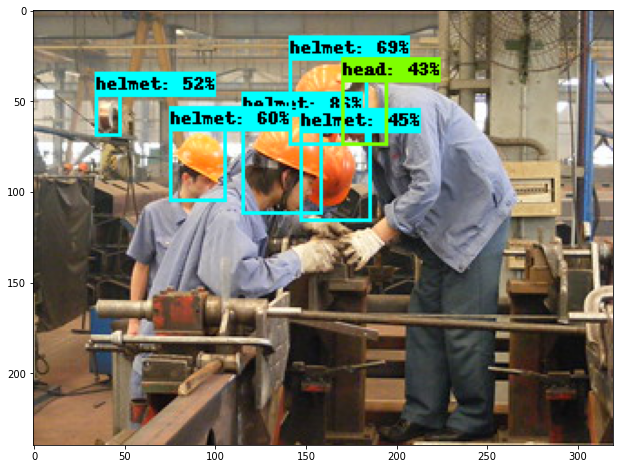

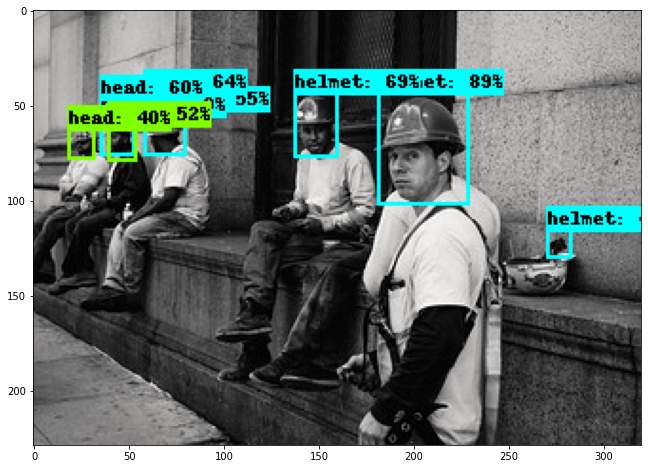

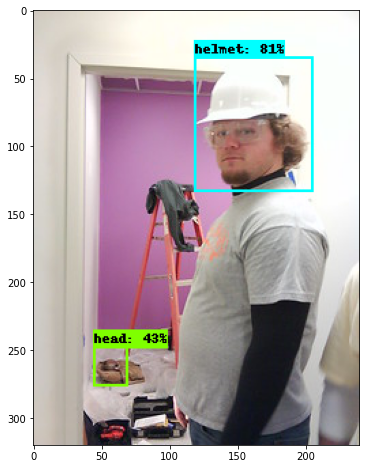

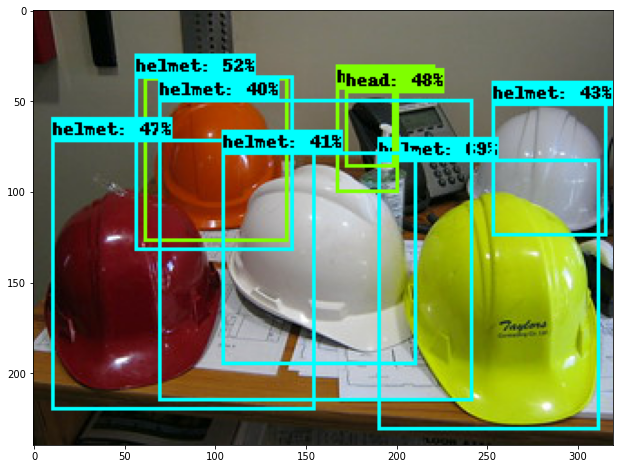

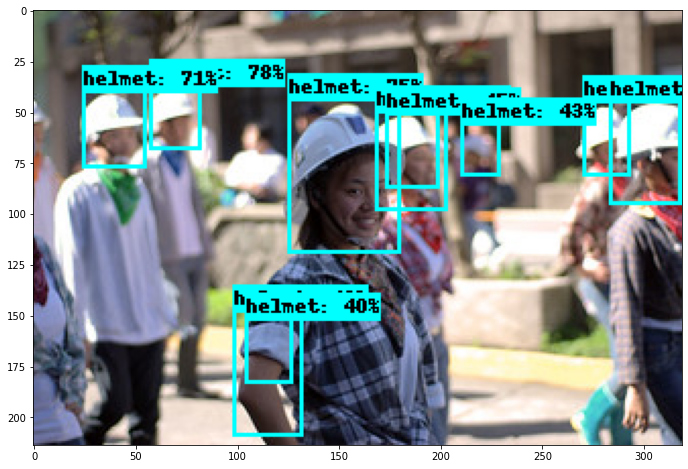

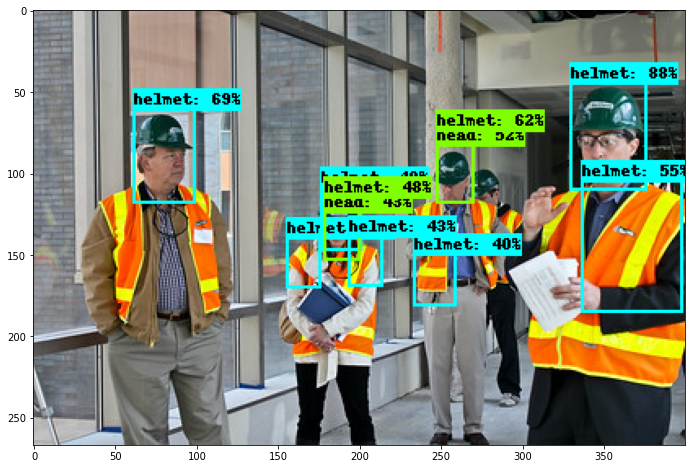

In [45]:
# Do a Quick Evaluation on the inference graph model.
import numpy as np
import os
import sys
import tensorflow as tf

from collections import defaultdict
from matplotlib import pyplot as plt
from PIL import Image

from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
%matplotlib inline

# Initialize tf.Graph()
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(OUTPUT_DIR+"/frozen_inference_graph.pb", 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

# Loads labels
label_map = label_map_util.load_labelmap('/content/output_ssdlite_mobiledet_hard_hat/labels.txt')
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=3, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Run Inference and populates results in a dict.
def run_inference(graph, image):
  with graph.as_default():
    with tf.Session() as sess:
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = [output.name for op in ops for output in op.outputs]
      tensor_dict = {}
      tensor_keys = ['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes']
      for key in tensor_keys:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(tensor_name)
      
      # Actual inference.
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')
      output_dict = sess.run(tensor_dict, feed_dict={image_tensor: np.expand_dims(image, 0)})

      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict['detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
  return output_dict

test_image_path = [os.path.join('/content/validate_img', 'image_{}.jpg'.format(i)) for i in range(1, 7)]
for image_path in test_image_path:
  print('Evaluating:', image_path)
  image = Image.open(image_path)
  img_width, img_height = image.size
  image_np = np.array(image.getdata()).reshape((img_height, img_width, 3)).astype(np.uint8)
  # Run inference.
  output_dict = run_inference(detection_graph, image_np)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      min_score_thresh=0.4,
      line_thickness=2)
  plt.figure(figsize=(12, 8))
  plt.imshow(image_np)

# **Evaluate the TFlite model**

Evaluating: /content/validate_img/image_1.jpg
Helmet 83.59375%
Helmet 69.53125%
Helmet 62.5%
Helmet 52.734375%
Helmet 44.921875%
Head 44.921875%
Helmet 42.1875%
Helmet 42.1875%
Helmet 35.15625%
Helmet 32.8125%
Helmet 30.46875%
Head 30.46875%
Person 28.515625%
Helmet 28.515625%
Helmet 28.515625%
Person 28.515625%
Person 28.515625%
Head 26.5625%
Person 26.5625%
Head 26.5625%
Helmet 26.5625%
Helmet 26.5625%
Person 24.609375%
Helmet 24.609375%
Person 24.609375%
Head 24.609375%
Helmet 24.609375%
Helmet 24.609375%
Helmet 22.65625%
Helmet 22.65625%
Helmet 22.65625%
Person 20.703125%
Helmet 20.703125%
Person 20.703125%
Helmet 20.703125%
Helmet 20.703125%
Helmet 19.140625%
Person 19.140625%
Helmet 19.140625%
Helmet 19.140625%
Person 19.140625%
Helmet 19.140625%
Person 19.140625%
Person 19.140625%
Person 19.140625%
Helmet 17.578125%
Helmet 17.578125%
Helmet 17.578125%
Helmet 17.578125%
Person 16.40625%
Head 16.40625%
Helmet 16.40625%
Person 16.40625%
Helmet 16.40625%
Helmet 16.40625%
Person 16.4

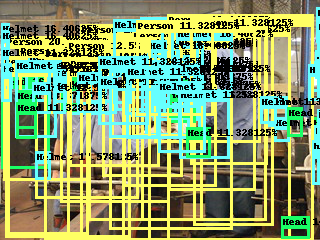

Evaluating: /content/validate_img/image_2.jpg
Helmet 89.453125%
Helmet 71.484375%
Head 64.84375%
Helmet 62.5%
Head 52.734375%
Head 47.265625%
Head 42.1875%
Helmet 35.15625%
Helmet 32.8125%
Head 28.515625%
Person 26.5625%
Helmet 26.5625%
Helmet 26.5625%
Head 24.609375%
Helmet 22.65625%
Helmet 22.65625%
Head 22.65625%
Person 20.703125%
Helmet 20.703125%
Person 20.703125%
Helmet 20.703125%
Head 19.140625%
Head 19.140625%
Helmet 19.140625%
Helmet 19.140625%
Helmet 19.140625%
Head 17.578125%
Helmet 17.578125%
Helmet 17.578125%
Helmet 17.578125%
Helmet 17.578125%
Head 17.578125%
Head 17.578125%
Person 17.578125%
Helmet 17.578125%
Person 16.40625%
Head 16.40625%
Helmet 16.40625%
Helmet 16.40625%
Helmet 14.84375%
Helmet 14.84375%
Head 14.84375%
Person 14.84375%
Person 14.84375%
Person 14.84375%
Helmet 14.84375%
Helmet 14.84375%
Helmet 13.671875%
Helmet 13.671875%
Head 13.671875%
Helmet 13.671875%
Helmet 12.5%
Person 12.5%
Helmet 12.5%
Helmet 12.5%
Helmet 12.5%
Head 12.5%
Head 12.5%
Helmet 11.3

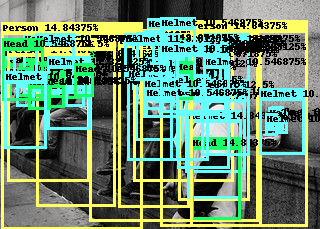

Evaluating: /content/validate_img/image_3.jpg
Helmet 80.859375%
Head 44.921875%
Helmet 35.15625%
Helmet 32.8125%
Person 30.46875%
Head 30.46875%
Helmet 26.5625%
Helmet 19.140625%
Helmet 19.140625%
Person 17.578125%
Helmet 17.578125%
Helmet 17.578125%
Helmet 17.578125%
Helmet 17.578125%
Helmet 17.578125%
Helmet 17.578125%
Helmet 17.578125%
Head 17.578125%
Helmet 17.578125%
Head 16.40625%
Head 16.40625%
Helmet 16.40625%
Person 16.40625%
Person 16.40625%
Head 14.84375%
Head 14.84375%
Person 14.84375%
Head 14.84375%
Helmet 13.671875%
Helmet 13.671875%
Person 13.671875%
Helmet 12.5%
Helmet 12.5%
Person 12.5%
Helmet 12.5%
Helmet 12.5%
Person 12.5%
Head 12.5%
Helmet 12.5%
Helmet 12.5%
Helmet 12.5%
Helmet 12.5%
Helmet 12.5%
Helmet 12.5%
Helmet 12.5%
Helmet 12.5%
Helmet 11.328125%
Helmet 11.328125%
Helmet 11.328125%
Helmet 11.328125%
Head 11.328125%
Helmet 11.328125%
Person 11.328125%
Helmet 10.546875%
Helmet 10.546875%
Helmet 10.546875%
Helmet 10.546875%
Helmet 10.546875%
Head 10.546875%
Head 

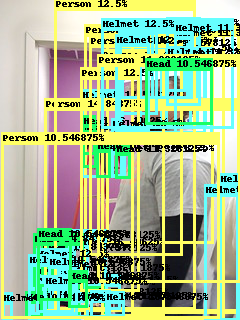

Evaluating: /content/validate_img/image_4.jpg
Helmet 69.53125%
Head 64.84375%
Head 50.0%
Helmet 47.265625%
Head 47.265625%
Helmet 42.1875%
Helmet 39.84375%
Helmet 37.5%
Head 35.15625%
Helmet 28.515625%
Helmet 26.5625%
Person 26.5625%
Helmet 26.5625%
Helmet 26.5625%
Helmet 24.609375%
Head 22.65625%
Helmet 22.65625%
Helmet 20.703125%
Head 20.703125%
Head 20.703125%
Helmet 20.703125%
Helmet 20.703125%
Helmet 19.140625%
Head 19.140625%
Helmet 17.578125%
Head 17.578125%
Helmet 17.578125%
Head 17.578125%
Head 17.578125%
Helmet 17.578125%
Helmet 17.578125%
Head 17.578125%
Head 17.578125%
Helmet 17.578125%
Helmet 16.40625%
Helmet 16.40625%
Helmet 16.40625%
Head 16.40625%
Helmet 16.40625%
Helmet 16.40625%
Head 16.40625%
Helmet 16.40625%
Helmet 14.84375%
Helmet 14.84375%
Head 14.84375%
Head 14.84375%
Helmet 13.671875%
Head 13.671875%
Head 13.671875%
Helmet 13.671875%
Head 13.671875%
Helmet 13.671875%
Head 13.671875%
Helmet 13.671875%
Head 13.671875%
Helmet 12.5%
Head 12.5%
Helmet 12.5%
Helmet 12

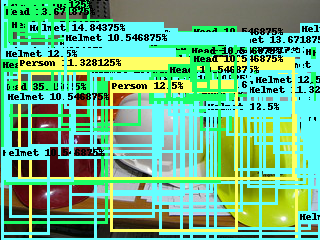

Evaluating: /content/validate_img/image_5.jpg
Helmet 77.34375%
Helmet 77.34375%
Helmet 75.390625%
Helmet 73.4375%
Helmet 62.5%
Helmet 57.8125%
Helmet 44.921875%
Helmet 42.1875%
Helmet 42.1875%
Helmet 37.5%
Helmet 35.15625%
Helmet 35.15625%
Head 30.46875%
Helmet 30.46875%
Person 30.46875%
Head 30.46875%
Helmet 30.46875%
Helmet 30.46875%
Person 28.515625%
Helmet 28.515625%
Helmet 28.515625%
Head 26.5625%
Helmet 26.5625%
Person 26.5625%
Helmet 26.5625%
Helmet 24.609375%
Helmet 24.609375%
Head 24.609375%
Person 24.609375%
Head 24.609375%
Person 24.609375%
Helmet 22.65625%
Helmet 22.65625%
Helmet 22.65625%
Person 20.703125%
Person 20.703125%
Head 20.703125%
Person 20.703125%
Head 20.703125%
Helmet 20.703125%
Helmet 19.140625%
Person 19.140625%
Person 19.140625%
Helmet 19.140625%
Person 19.140625%
Helmet 19.140625%
Helmet 19.140625%
Person 17.578125%
Helmet 17.578125%
Helmet 17.578125%
Helmet 17.578125%
Helmet 17.578125%
Helmet 17.578125%
Person 17.578125%
Head 17.578125%
Head 17.578125%
Hel

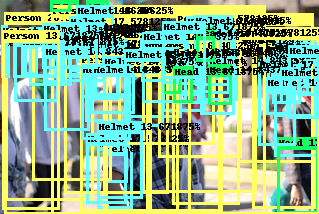

Evaluating: /content/validate_img/image_6.jpg
Helmet 87.5%
Helmet 69.53125%
Helmet 69.53125%
Helmet 60.15625%
Helmet 52.734375%
Helmet 50.0%
Helmet 47.265625%
Helmet 44.921875%
Helmet 37.5%
Head 37.5%
Helmet 35.15625%
Helmet 32.8125%
Helmet 32.8125%
Head 32.8125%
Helmet 32.8125%
Helmet 30.46875%
Helmet 26.5625%
Helmet 26.5625%
Person 26.5625%
Helmet 24.609375%
Helmet 24.609375%
Helmet 22.65625%
Helmet 22.65625%
Helmet 22.65625%
Helmet 22.65625%
Helmet 22.65625%
Person 20.703125%
Person 20.703125%
Person 19.140625%
Helmet 19.140625%
Helmet 19.140625%
Helmet 19.140625%
Helmet 19.140625%
Helmet 17.578125%
Helmet 17.578125%
Helmet 17.578125%
Helmet 17.578125%
Helmet 17.578125%
Helmet 17.578125%
Helmet 17.578125%
Helmet 17.578125%
Helmet 17.578125%
Helmet 17.578125%
Helmet 17.578125%
Helmet 17.578125%
Helmet 17.578125%
Head 17.578125%
Person 17.578125%
Person 17.578125%
Helmet 16.40625%
Person 16.40625%
Helmet 16.40625%
Helmet 16.40625%
Head 16.40625%
Person 16.40625%
Head 16.40625%
Person 

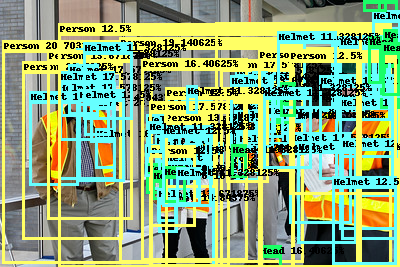

In [46]:
import os
import re
import numpy as np
from PIL import Image
from PIL import ImageDraw
%matplotlib inline

# Creates tflite interpreter
interpreter = tf.lite.Interpreter(OUTPUT_DIR + '/ssdlite_mobiledet_hard_hat.tflite')
interpreter.allocate_tensors()
interpreter.invoke() # warmup
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
width = input_details[0]['shape'][2]
height = input_details[0]['shape'][1]

def read_label_file(file_path):
  with open(file_path, 'r', encoding='utf-8') as f:
    lines = f.readlines()
  ret = {}
  for row_number, content in enumerate(lines):
    pair = re.split(r'[:\s]+', content.strip(), maxsplit=1)
    if len(pair) == 2 and pair[0].strip().isdigit():
      ret[int(pair[0])] = pair[1].strip()
    else:
      ret[row_number] = content.strip()
  return ret

def run_inference(interpreter, image):
  interpreter.set_tensor(input_details[0]['index'], image)
  interpreter.invoke()

  boxes= interpreter.get_tensor(output_details[0]['index'])[0]
  classes = interpreter.get_tensor(output_details[1]['index'])[0]
  scores = interpreter.get_tensor(output_details[2]['index'])[0]
  num_detections = interpreter.get_tensor(output_details[3]['index'])[0]

  return boxes, classes, scores

test_image_paths = [os.path.join('/content/validate_img', 'image_{}.jpg'.format(i)) for i in range(1, 7)]
for image_path in test_image_paths:
  print('Evaluating:', image_path)
  image = Image.open(image_path)
  image_width, image_height = image.size
  draw = ImageDraw.Draw(image)
  resized_image = image.resize((width, height))
  np_image = np.array(resized_image.getdata()).reshape((height, width, 3)).astype(np.uint8)
  input_tensor = np.expand_dims(np_image, axis=0)
  # Run inference
  boxes, classes, scores = run_inference(interpreter, input_tensor)
  # Draw results on image
  colors = {0:(25, 255, 102), 1:(102, 255, 255), 2:(255,255,100)}
  labels = read_label_file(OUTPUT_DIR + '/labels_2.txt')
  for i in range(len(boxes)):
    if scores[i] > 0.1:
      ymin = int(max(1, (boxes[i][0] * image_height)))
      xmin = int(max(1, (boxes[i][1] * image_width)))
      ymax = int(min(image_height, (boxes[i][2] * image_height)))
      xmax = int(min(image_width, (boxes[i][3] * image_width)))
      draw.rectangle((xmin, ymin, xmax, ymax), width=3, outline=colors[int(classes[i])])
      draw.rectangle((xmin, ymin, xmax, ymin-10), fill=colors[int(classes[i])])
      text = labels[int(classes[i])] + ' ' + str(scores[i]*100) + '%'
      print(text)
      draw.text((xmin+2, ymin-10), text, fill=(0,0,0), width=2)
  display(image)

# **Real-time detection**

In [47]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [48]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [49]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 320, 320);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 320; //video.videoWidth;
      captureCanvas.height = 320; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [50]:
from datetime import datetime

In [62]:

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([height, width, 4], dtype=np.uint8)
    input_tensor = np.expand_dims(frame, axis=0)
    # Run inference
    start = datetime.now()

    boxes, classes, scores = run_inference(interpreter, input_tensor)
    
    end = datetime.now()
    duration = end - start
    #print('INFERENCE TIME:', str(duration.microseconds/1000), " ms")

    for i in range(len(boxes)):
      if scores[i] > .6:
        ymin = int(max(1, (boxes[i][0] * 320)))
        xmin = int(max(1, (boxes[i][1] * 320)))
        ymax = int(min(image_height, (boxes[i][2] * 320)))
        xmax = int(min(image_width, (boxes[i][3] * 320)))

        bbox_array = cv2.rectangle(bbox_array, (xmin, ymin), (xmax, ymax), colors[int(classes[i])], 1)
        bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format(labels[int(classes[i])], float(scores[i])),
                        (xmin, ymin), cv2.FONT_HERSHEY_SIMPLEX, 0.4,
                        colors[int(classes[i])], 1)
        bbox_array = cv2.putText(bbox_array, "{}{:.2f}{}".format("INFERENCE TIME: ", float(duration.microseconds/1000), " ms"),
                        (100,300), cv2.FONT_HERSHEY_SIMPLEX, 0.4,
                        (255, 0, 0), 1)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>